In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import math
import seaborn as sns

# SLIDS Homework 1
## James McKenna

### 1a)

With loss function $l_{\theta}(z) = || z-\theta||^2$ when reporting location $\theta$, the risk <br>
$E_{0}[l_{\theta}(z)] = E_{0}[(z-{\theta})^2]$ <br>
$ = E_{0}[z^2 + \theta² - 2\theta z]$ <br>
$ = E_{0}[z^2] + E_{0}[\theta²] - 2\theta E_{0}[z]$. <br>
Identifying $z$ and $\theta$ as row matrices <br>
$E_{0}[l_{\theta}] = E_{0}[\theta^T\theta] - 2\theta E_{0}[z] + E_{0}[z^Tz]$ <br>
and since this refers to the expectation with respect to the distribution generating the data, we can simply write <br>
$L(\theta) = E_{0}[l_{\theta}(z)] = \theta ^T\theta - 2\theta^T E_{0}[z] + E_{0}[z^Tz]$ <br>
the mean squared error of an estimator $\theta$ with respect to an unknown parameter $z$ <br>
The above result is a quadratic function of $\theta$, and we can find the minimizing value by differentiation:
$L(\theta) = 2E[z] - 2\theta$ <br>
giving us a minimizing value of $\theta = E[z]$ 

### 1b)

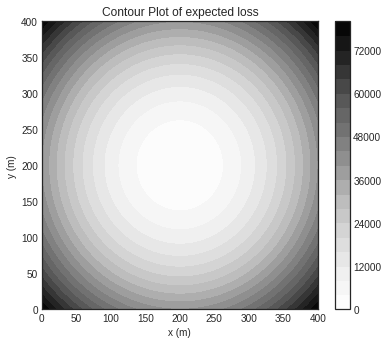

In [2]:
u = np.linspace(0,400,400)
[X, Y] = np.meshgrid(u, u)

def MSE(x, y):
    return (200-x)**2 + (200-y)**2
     
Z = MSE(X, Y)

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.contourf(X,Y,Z,20)
plt.colorbar(cp)
ax.set_title('Contour Plot of expected loss')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

### 1c)

Since the degrees of freedom parameter controls the kurtosis of the test distribution, as the unknown degrees of freedom decrease, the distribution becomes heavier tailed. This means we will require increasing amounts of training data to obtain an estimator with minimum risk.

### 1d)

If the expected loss of $\theta$ when data is drawn from a test distribution $p_{0}(z)$ is: <br>
$L(\theta) = E_{0}[l_{\theta}] = \int_{Z} l_{\theta}(z) p_{0}(z)dz$ <br>
and the empirical distribution puts equal weight on all point masses, such that with training data $z^{n}$, <br>
$p_{n}(z) = p(z; n^{-1}, z^{n})$ <br>
then the risk for a given parameter using the empirical distribution <br>
$L_{n}(\theta) = E_{n}[l_{\theta}(z)] = n^{-1} \int_{Z} l_{\theta}(z) p_{n}(z)dz$ <br>
$ = n^{-1} \sum \limits _{i=1} ^{n} ||z_{i} - \theta ||^2$ <br>

$ E_{n}[l_{\theta}(z)] = n^{-1} E_{n}(z - \theta)^2$ <br>
and by differentiating using the product rule <br>
$ L_{n}(\theta) = -2(E_{n}[z] - \theta) / n^2$ <br>
giving us a minimizing value of $\hat{\theta}_{n} = E_{n}[z]$

### 1e)

In [48]:
mean = [200, 200]
cov = [[400, 50], [50, 400]]  # diagonal covariance

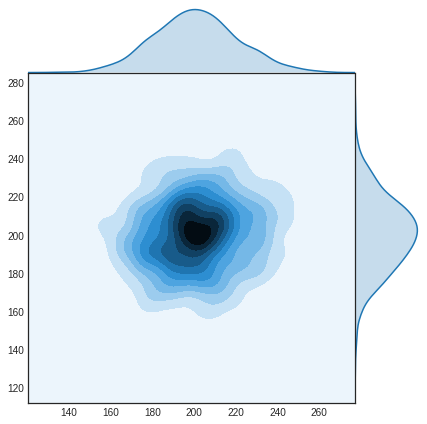

In [49]:
# take sample 
sample = 1000
x, y = np.random.multivariate_normal(mean, cov, sample).T
sns.jointplot(x=x,
              y=y, 
              kind="kde", 
              space=0);

In [61]:
# Best parameter is mean of full sample
theta_o = np.array([np.mean(x),np.mean(y)])
theta_o

array([201.0118113 , 200.21943181])

In [51]:
# learned parameters from subsamples 
def get_theta(x,y,sub):
    x_sample = np.random.choice(x,sub)
    y_sample = np.random.choice(y,sub)
    mean_x = int(np.mean(x_sample))
    mean_y = int(np.mean(y_sample))
    return np.array([mean_x, mean_y])
    
theta_1 = get_theta(x,y,1)
theta_10 = get_theta(x,y,10)
theta_100 = get_theta(x,y,100)
theta_1000 = get_theta(x,y,1000)

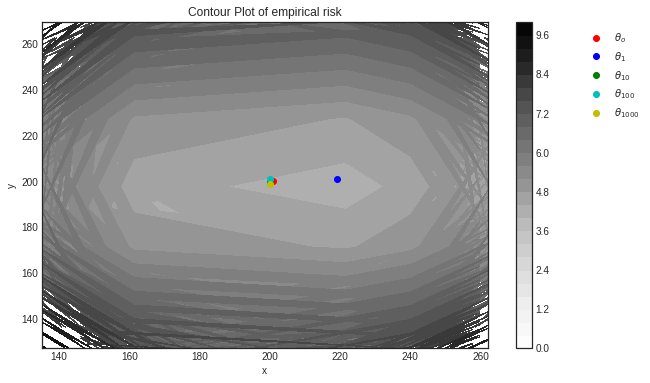

In [52]:
# plot empirical risk contours
[X, Y] = np.meshgrid(x, y)

def loss(x, y):
    return (x-theta_o[0])**2 + (y-theta_o[1])**2
     
Z = 1/sample * loss(X, Y)

fig = plt.figure(figsize=(10,6))
cp = plt.contourf(X,Y,Z,25)
plt.colorbar(cp)
plt.plot(theta_o[0],theta_o[1],'ro', label=r"$\theta_{o}$")
plt.plot(theta_1[0],theta_1[1],'bo', label=r"$\theta_{1}$")
plt.plot(theta_10[0],theta_10[1],'go', label=r"$\theta_{10}$")
plt.plot(theta_100[0],theta_100[1],'co', label=r"$\theta_{100}$")
plt.plot(theta_1000[0],theta_1000[1],'yo', label=r"$\theta_{1000}$")
plt.title('Contour Plot of empirical risk')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

### 1f)

In [53]:
# Initialize value of learned parameter
cur_theta = np.array([0,0])
# fixed learning rate
gamma = 0.05

In [54]:
precision = 0.05 #This tells us when to stop the algorithm
previous_step_size = np.array([1,1])
max_iters = 1000 # maximum number of iterations
iters = 0 #iteration counter
theta_o = np.array([25,25])
df = lambda x: 2*(mean-x) #Empirical Risk Gradient 

In [55]:
descent_vals = [] # initialize container to hold descent values

In [56]:
while max(previous_step_size) > precision and iters < max_iters:
    prev_theta = cur_theta # Store current theta value in prev_theta
    cur_theta = cur_theta + gamma * df(prev_theta) # Grad descent
    previous_step_size = abs(cur_theta - prev_theta) # Change in x
    iters = iters+1 # iteration count
    descent_vals.append(cur_theta) # Print iterations
    
print("The local minimum occurs at", cur_theta)

The local minimum occurs at [199.55629375 199.55629375]


In [57]:
descent_vals

[array([20., 20.]),
 array([38., 38.]),
 array([54.2, 54.2]),
 array([68.78, 68.78]),
 array([81.902, 81.902]),
 array([93.7118, 93.7118]),
 array([104.34062, 104.34062]),
 array([113.906558, 113.906558]),
 array([122.5159022, 122.5159022]),
 array([130.26431198, 130.26431198]),
 array([137.23788078, 137.23788078]),
 array([143.5140927, 143.5140927]),
 array([149.16268343, 149.16268343]),
 array([154.24641509, 154.24641509]),
 array([158.82177358, 158.82177358]),
 array([162.93959622, 162.93959622]),
 array([166.6456366, 166.6456366]),
 array([169.98107294, 169.98107294]),
 array([172.98296565, 172.98296565]),
 array([175.68466908, 175.68466908]),
 array([178.11620217, 178.11620217]),
 array([180.30458196, 180.30458196]),
 array([182.27412376, 182.27412376]),
 array([184.04671138, 184.04671138]),
 array([185.64204025, 185.64204025]),
 array([187.07783622, 187.07783622]),
 array([188.3700526, 188.3700526]),
 array([189.53304734, 189.53304734]),
 array([190.57974261, 190.57974261]),
 arr

In [58]:
descent_arr = np.asarray(descent_vals)

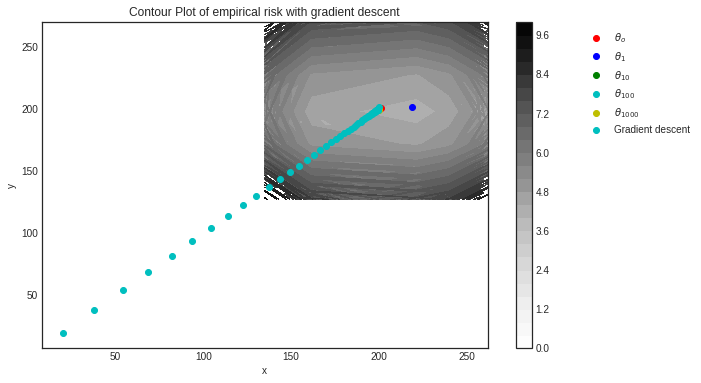

In [63]:
# plot empirical risk contours with gradient descent     
fig = plt.figure(figsize=(10,6))
cp = plt.contourf(X,Y,Z,25)
plt.colorbar(cp)
plt.plot(theta_o[0],theta_o[1],'ro', label=r"$\theta_{o}$")
plt.plot(theta_1[0],theta_1[1],'bo', label=r"$\theta_{1}$")
plt.plot(theta_10[0],theta_10[1],'go', label=r"$\theta_{10}$")
plt.plot(theta_100[0],theta_100[1],'co', label=r"$\theta_{100}$")
plt.plot(theta_1000[0],theta_1000[1],'yo', label=r"$\theta_{1000}$")
plt.plot(descent_arr[:,0],descent_arr[:,1],'co', label="Gradient descent")
plt.title('Contour Plot of empirical risk with gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

### 1g)
Failed to answer final question